In [19]:
# Imports

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from hill_climbing import hill_climbing, hill_climbing_many_runs, hill_climbing_open_file
import numpy as np

import os

import pickle
from scipy import stats

In [2]:
# Open data
n_runs = 10
n_cities = 30
max_value = 10000
n_generations = 1500
folder = 'data'

mtx_list, run_time_list, performance_list, used_or_not_list, indices_list = hill_climbing_open_file(n_runs, n_cities, max_value, n_generations, folder)

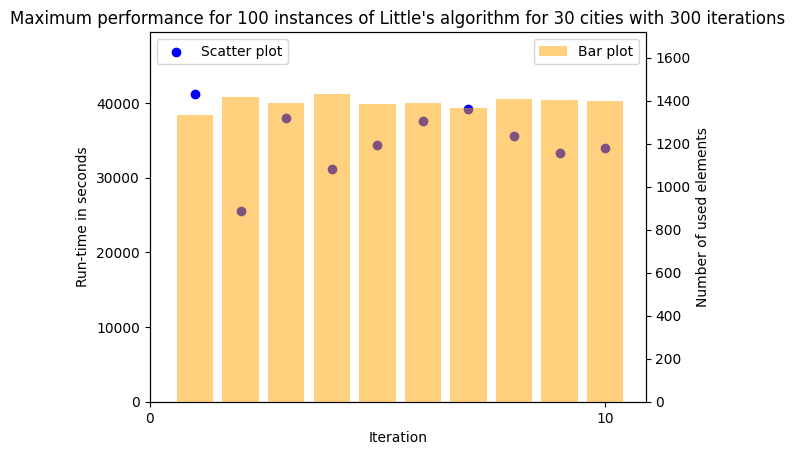

In [4]:
# Highest run-time per iteration of hill-climber

# Define the data for the scatter plot
x = range(1, n_runs + 1)
y_scatter = np.array([performance_list[i - 1][n_generations - 1] for i in range(1, n_runs + 1)])

# Create the scatter plot
fig, ax2 = plt.subplots()
ax2.scatter(x, y_scatter, label='Scatter plot', color='blue')

# Set the y-axis label and limits for the scatter plot
ax2.set_ylabel('Run-time in seconds')
ax2.set_ylim([0, np.max(y_scatter)*1.2])
ax2.set_xlabel('Iteration')

# Define the data for the bar plot
y_bar = np.array([sum(used_or_not_list[i - 1]) - 1 for i in range(1, n_runs + 1)])

# Create the bar plot
ax1 = ax2.twinx()
ax1.bar(x, y_bar, label='Bar plot', color='orange', alpha=0.5)

# Set the y-axis label and limits for the bar plot
ax1.set_ylabel('Number of used elements')
ax1.set_ylim([0, np.max(y_bar)*1.2])
ax1.yaxis.set_major_locator(MaxNLocator(integer=True)) # set y axis to show only integer values

# Set the x-axis tick marks
plt.xticks(range(0, n_runs + 1, 10))

# Set the plot title
plt.title("Maximum performance for 100 instances of Little's algorithm for 30 cities with 300 iterations")

# Add the legend and show the plot
ax2.legend(loc='upper left')
ax1.legend(loc='upper right')
plt.show()

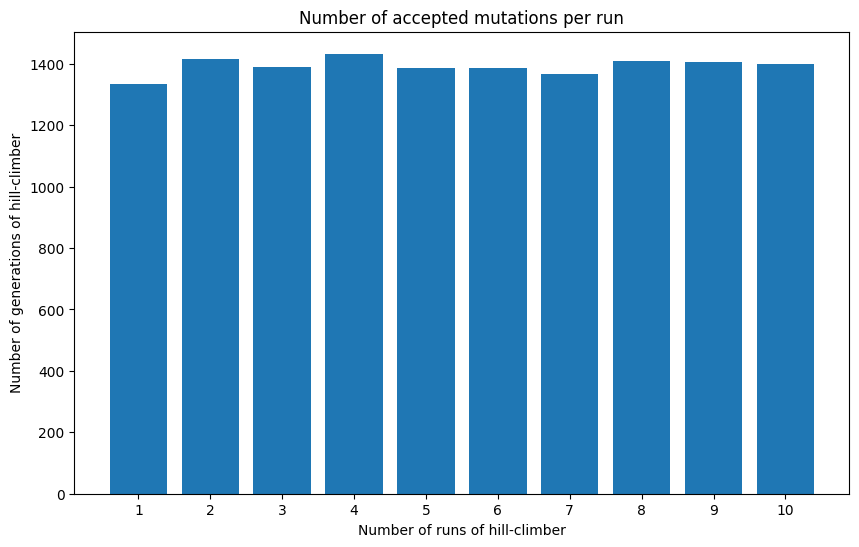

In [5]:
# Number of accepted mutations

# Figure size
plt.figure(figsize=(10,6))

# Set x axis
x = range(1, n_runs + 1)

# Set y axis
y = np.array([len(np.where(used_or_not_list[i - 1])[0]) for i in range(1, n_runs + 1)])

# Set x ticks so all x labels show
plt.xticks(x, x)

plt.bar(x, y)
plt.title("Number of accepted mutations per run")
plt.xlabel("Number of runs of hill-climber")
plt.ylabel("Number of generations of hill-climber")
plt.show()

In [6]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

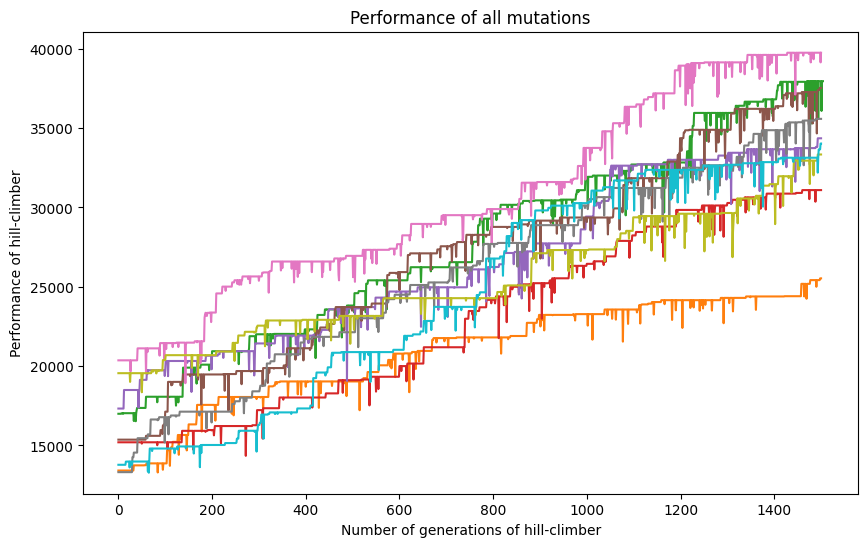

In [7]:
# Performance of accepted mutations

# Set figure size
plt.figure(figsize=(10,6))

# Plot performance of all matrices for each run
for i in range(1, n_runs):
    plt.plot(np.array(performance_list[i]), color = colors[i])

# Set title, x-label, y-label
plt.title("Performance of all mutations")
plt.xlabel("Number of generations of hill-climber")
plt.ylabel("Performance of hill-climber")
plt.show()

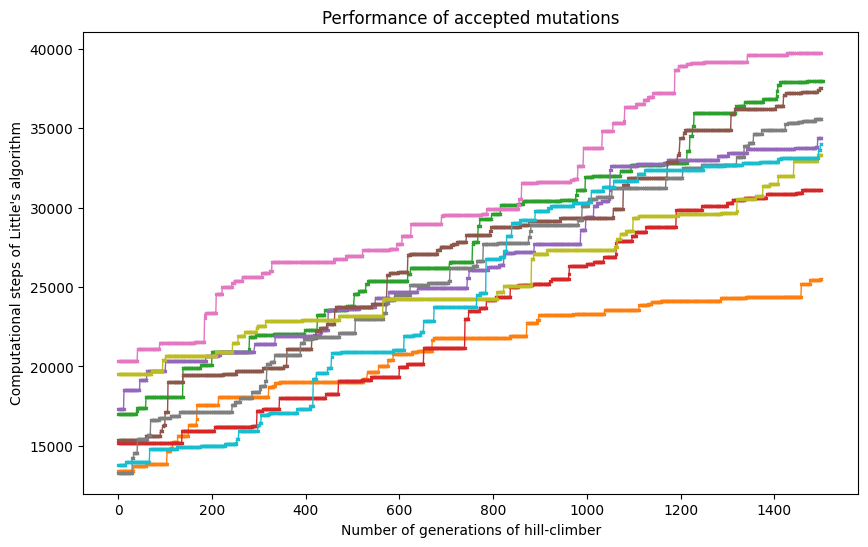

In [8]:
# Performance of accepted mutations

# Set figure size
plt.figure(figsize=(10,6))

# Plot performance of accepted matrices for each run
for i in range(1, n_runs):
    plt.plot(np.where(used_or_not_list[i])[0], np.array(performance_list[i])[used_or_not_list[i]], marker='x', markersize=2, linewidth = 1, color = colors[i])

# Set title, x-label, y-label
plt.title("Performance of accepted mutations")
plt.xlabel("Number of generations of hill-climber")
plt.ylabel("Computational steps of Little's algorithm")
plt.show()

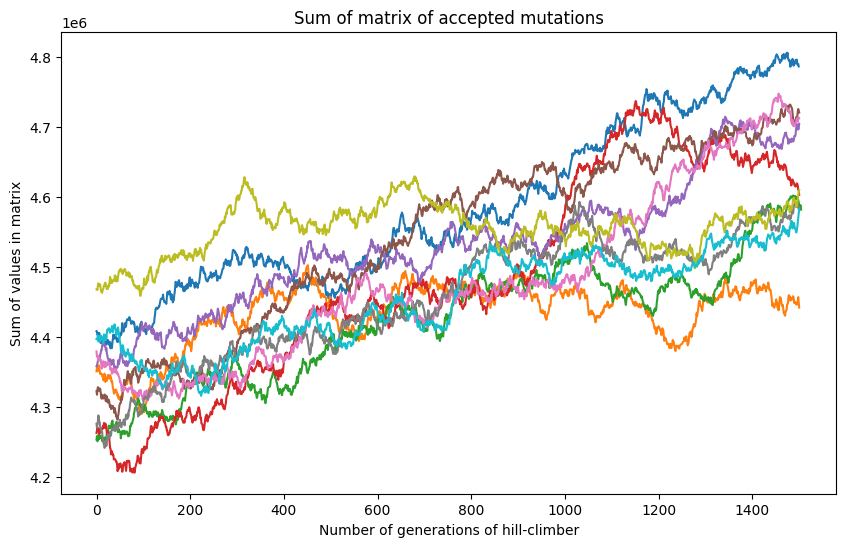

In [10]:
# Sum of matrix of accepted mutations

# Set figure size
plt.figure(figsize=(10,6))

# Calculate the sum of values for each matrix in list_mtx
sum_values = [[np.ma.masked_invalid(matrix).sum() for matrix in sublist] for sublist in mtx_list]

# Plot the sum of values in each matrix
for i in range(n_runs):
    plt.plot(np.where(used_or_not_list[i])[0],
             np.array(sum_values[i])[np.where(used_or_not_list[i])[0]], color = colors[i])

# Set title, x-label, y-label
plt.title("Sum of matrix of accepted mutations")
plt.xlabel("Number of generations of hill-climber")
plt.ylabel("Sum of values in matrix")
plt.show()

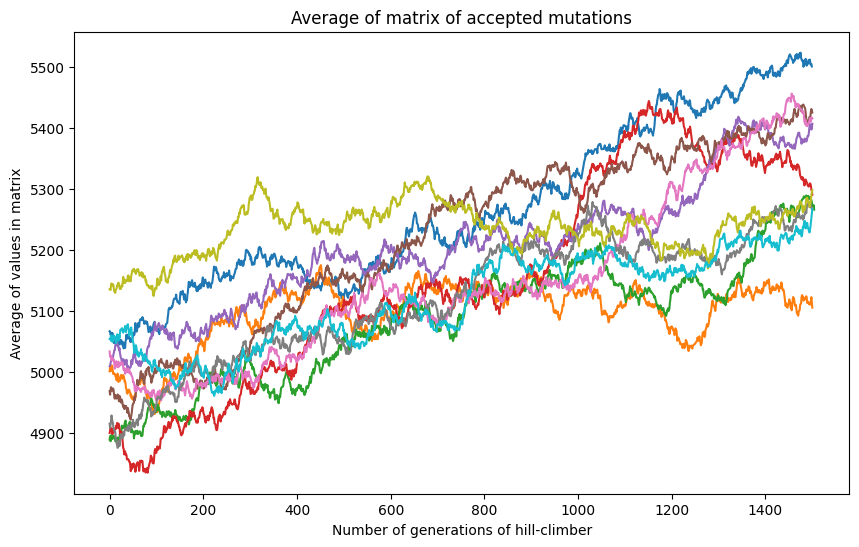

In [11]:
# Average of matrix of accepted mutations

# Set figure size
plt.figure(figsize=(10,6))

# Calculate the sum of values for each matrix in list_mtx
average_values = [[(np.ma.masked_invalid(matrix).sum() / 870) for matrix in sublist] for sublist in mtx_list]

# Plot the sum of values in each matrix
for i in range(n_runs):
    plt.plot(np.where(used_or_not_list[i])[0],
             np.array(average_values[i])[np.where(used_or_not_list[i])[0]], color = colors[i])

# Set title, x-label, y-label
plt.title("Average of matrix of accepted mutations")
plt.xlabel("Number of generations of hill-climber")
plt.ylabel("Average of values in matrix")
plt.show()

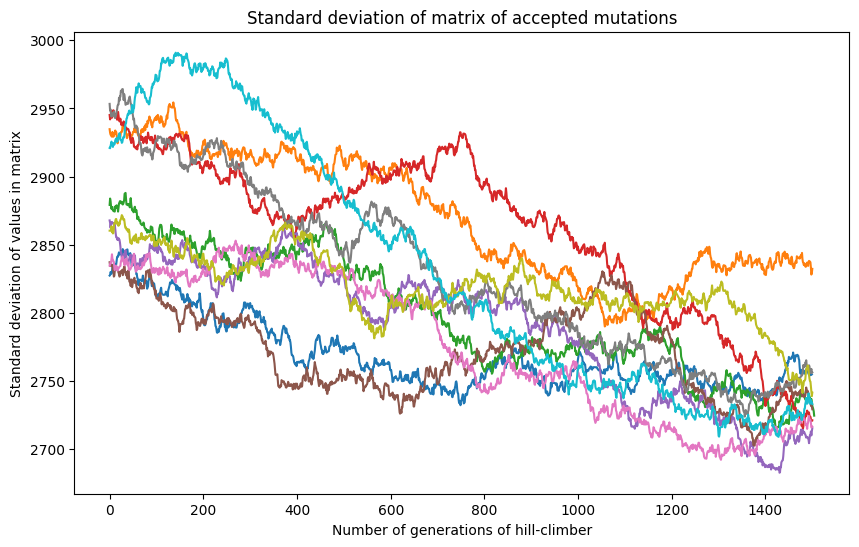

In [12]:
# Standard deviation of matrix of accepted mutations

# Set figure size
plt.figure(figsize=(10,6))

# Calculate the sum of values for each matrix in list_mtx
sd_values = [[(np.ma.masked_invalid(matrix).std()) for matrix in sublist] for sublist in mtx_list]

# Plot the sum of values in each matrix
for i in range(n_runs):
    plt.plot(np.where(used_or_not_list[i])[0],
             np.array(sd_values[i])[np.where(used_or_not_list[i])[0]], color = colors[i])

# Set title, x-label, y-label
plt.title("Standard deviation of matrix of accepted mutations")
plt.xlabel("Number of generations of hill-climber")
plt.ylabel("Standard deviation of values in matrix")
plt.show()

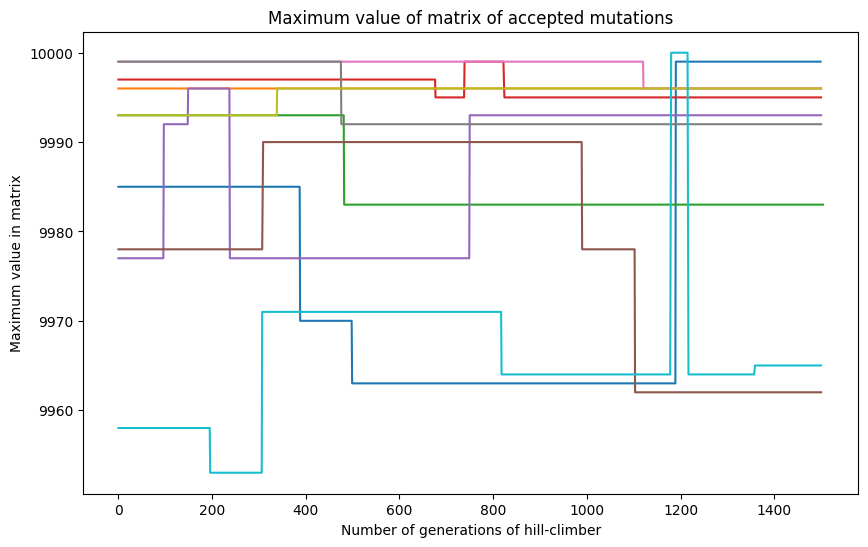

In [13]:
# Maximum value of matrix of accepted mutations

# Set figure size
plt.figure(figsize=(10,6))

# Calculate the maximum of values for each matrix in list_mtx
max_values = [[(np.ma.masked_invalid(matrix).max()) for matrix in sublist] for sublist in mtx_list]

# Plot the maximum of values in each matrix
for i in range(n_runs):
    plt.plot(np.where(used_or_not_list[i])[0],
             np.array(max_values[i])[np.where(used_or_not_list[i])[0]], color = colors[i])

# Set title, x-label, y-label
plt.title("Maximum value of matrix of accepted mutations")
plt.xlabel("Number of generations of hill-climber")
plt.ylabel("Maximum value in matrix")
plt.show()

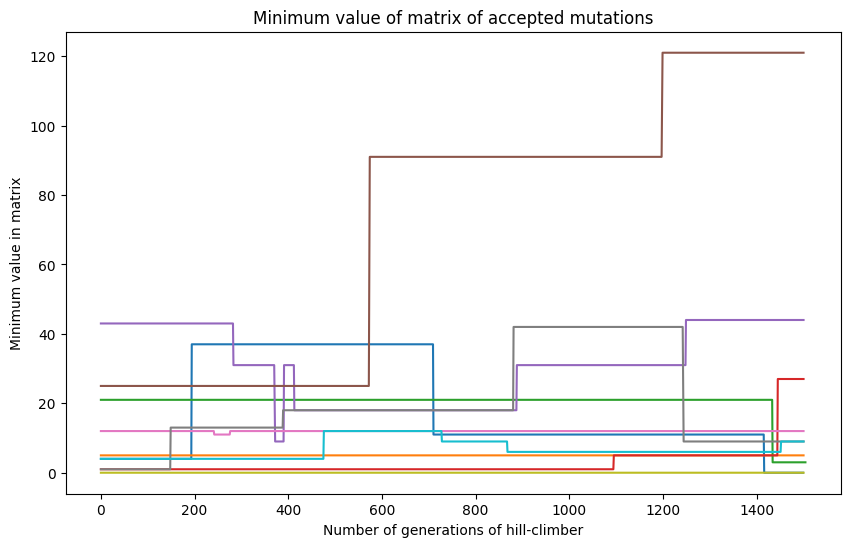

In [14]:
# Minimum value of matrix of accepted mutations

# Set figure size
plt.figure(figsize=(10,6))

# Calculate the maximum of values for each matrix in list_mtx
min_values = [[(np.ma.masked_invalid(matrix).min()) for matrix in sublist] for sublist in mtx_list]

# Plot the maximum of values in each matrix
for i in range(n_runs):
    plt.plot(np.where(used_or_not_list[i])[0],
             np.array(min_values[i])[np.where(used_or_not_list[i])[0]], color = colors[i])

# Set title, x-label, y-label
plt.title("Minimum value of matrix of accepted mutations")
plt.xlabel("Number of generations of hill-climber")
plt.ylabel("Minimum value in matrix")
plt.show()

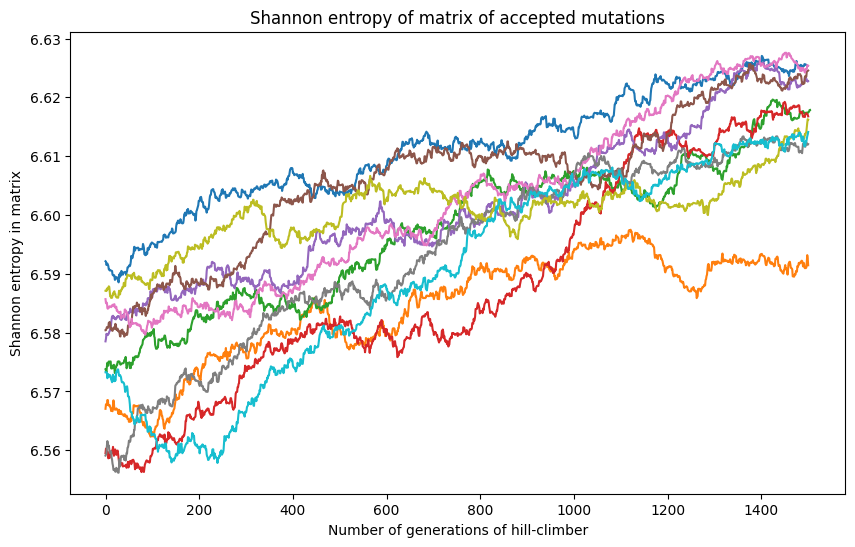

In [21]:
# Shannon entropy of matrix of accepted mutations

# Set figure size
plt.figure(figsize=(10,6))

# Calculate the Shannon entropy for each matrix in list_mtx
entropy_values = [[stats.entropy(matrix[np.isfinite(matrix)]) for matrix in sublist] for sublist in mtx_list]

# Plot the maximum of values in each matrix
for i in range(n_runs):
    plt.plot(np.where(used_or_not_list[i])[0],
             np.array(entropy_values[i])[np.where(used_or_not_list[i])[0]], color = colors[i])

# Set title, x-label, y-label
plt.title("Shannon entropy of matrix of accepted mutations")
plt.xlabel("Number of generations of hill-climber")
plt.ylabel("Shannon entropy in matrix")
plt.show()

In [ ]:
# Average, sd, highest number, lowest number, entropy, correlation, number replaced (mutation size), gaps (values for the first and last matrix)